<a href="https://colab.research.google.com/github/Ravi-shankar100/Titanic-EDA/blob/master/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
train = pd.read_csv("titanic_train.csv")

In [179]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
##Finding the Missing values

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


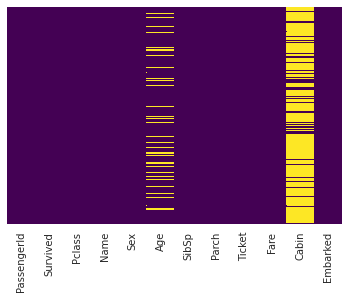

In [181]:
sns.heatmap(train.isnull() , yticklabels= False, cbar= False,cmap = 'viridis')

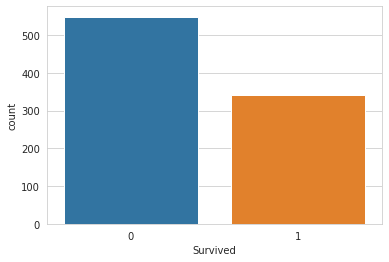

In [182]:
sns.set_style("whitegrid")
sns.countplot(x = train['Survived'], data = train)

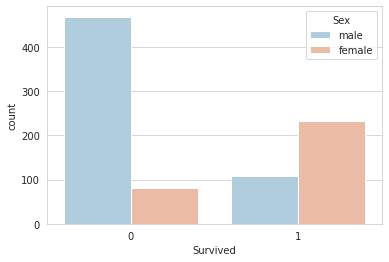

In [183]:
sns.set_style("whitegrid")
sns.countplot(x = 'Survived' , hue = 'Sex' , data=train, palette = 'RdBu_r')

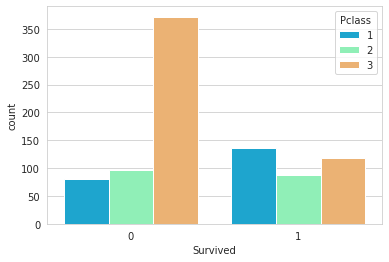

In [184]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue='Pclass',data= train,palette= 'rainbow')

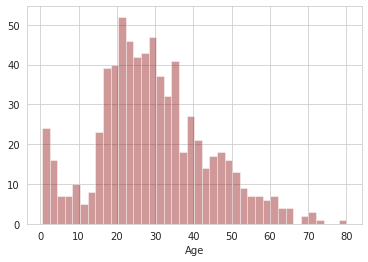

In [185]:
sns.distplot(train['Age'].dropna(), kde = False,color = 'darkred',bins = 40)

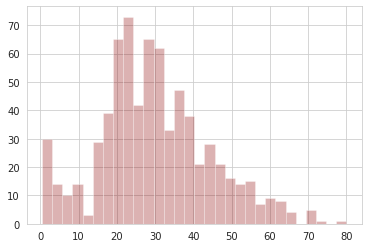

In [186]:
train['Age'].hist(bins = 30,color= 'darkred',alpha= 0.3)

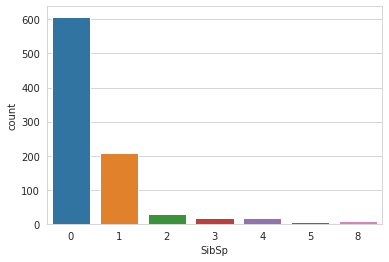

In [187]:
sns.countplot(x = 'SibSp', data = train)

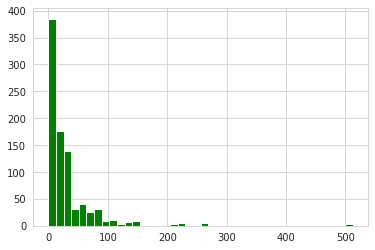

In [188]:
train['Fare'].hist(color = 'green',bins = 40)

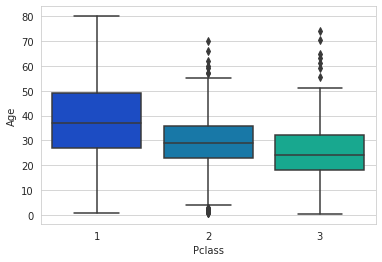

In [189]:
##Data Cleaning
sns.boxplot(x = 'Pclass',y= 'Age',data = train,palette= 'winter')

In [190]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [191]:
## Now Apply the Function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

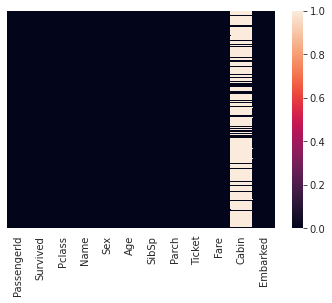

In [192]:
##Now lets check the heat map

sns.heatmap(train.isnull(),yticklabels = False)

In [193]:
train.drop('Cabin',axis = 1,inplace = True)

In [194]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [195]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [196]:
sex = pd.get_dummies(train['Sex'],drop_first= True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [197]:
train = train.drop(['Sex','Embarked','PassengerId','Name'],axis= 1)

In [198]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,0,3,22.0,1,0,A/5 21171,7.2500
1,1,1,38.0,1,0,PC 17599,71.2833
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,35.0,1,0,113803,53.1000
4,0,3,35.0,0,0,373450,8.0500


In [199]:
train.drop(['Ticket'],axis = 1,inplace = True)

In [200]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [201]:
train = pd.concat([train,sex,embark],axis = 1)

In [202]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [203]:
##Train Test Split of the Data
X = train.iloc[: , 1:]
y = train.iloc[:, -1]

In [204]:
y

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: S, Length: 891, dtype: uint8

In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 100)

In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
y_pred = classifier.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [210]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 81,   0],
       [  0, 187]])

In [211]:
score = accuracy_score(y_test,y_pred)
score

1.0